In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn 


In [128]:
INPUT_FILE_PATH = './dataset.csv'
all_data = pd.read_csv(INPUT_FILE_PATH)
all_data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [129]:
print('MISSIN VALUES :\n')
print(all_data.isnull().sum())

MISSIN VALUES :

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64


In [130]:
all_data['GARAGE'] = all_data['GARAGE'].fillna(all_data['GARAGE'].median())
all_data['BUILD_YEAR'] = all_data['BUILD_YEAR'].fillna(all_data['BUILD_YEAR'].quantile(0.75))
all_data = all_data.drop(['NEAREST_SCH_RANK'], axis=1)

all_data.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

In [131]:
all_data['DATE_SOLD'] = all_data['DATE_SOLD'].str.replace('\r', '')
all_data['DATE_SOLD'] = pd.to_datetime(all_data['DATE_SOLD'])
cols = ['GARAGE', 'BUILD_YEAR']
all_data[cols] = all_data[cols].applymap(np.int64)

all_data.dtypes


ADDRESS                     object
SUBURB                      object
PRICE                        int64
BEDROOMS                     int64
BATHROOMS                    int64
GARAGE                       int64
LAND_AREA                    int64
FLOOR_AREA                   int64
BUILD_YEAR                   int64
CBD_DIST                     int64
NEAREST_STN                 object
NEAREST_STN_DIST             int64
DATE_SOLD           datetime64[ns]
POSTCODE                     int64
LATITUDE                   float64
LONGITUDE                  float64
NEAREST_SCH                 object
NEAREST_SCH_DIST           float64
dtype: object

/tmp/ipykernel_190/2129317479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(all_data.corr())
/tmp/ipykernel_190/2129317479.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(all_data.corr(), mask=mask, annot=True, annot_kws={"size": 14})


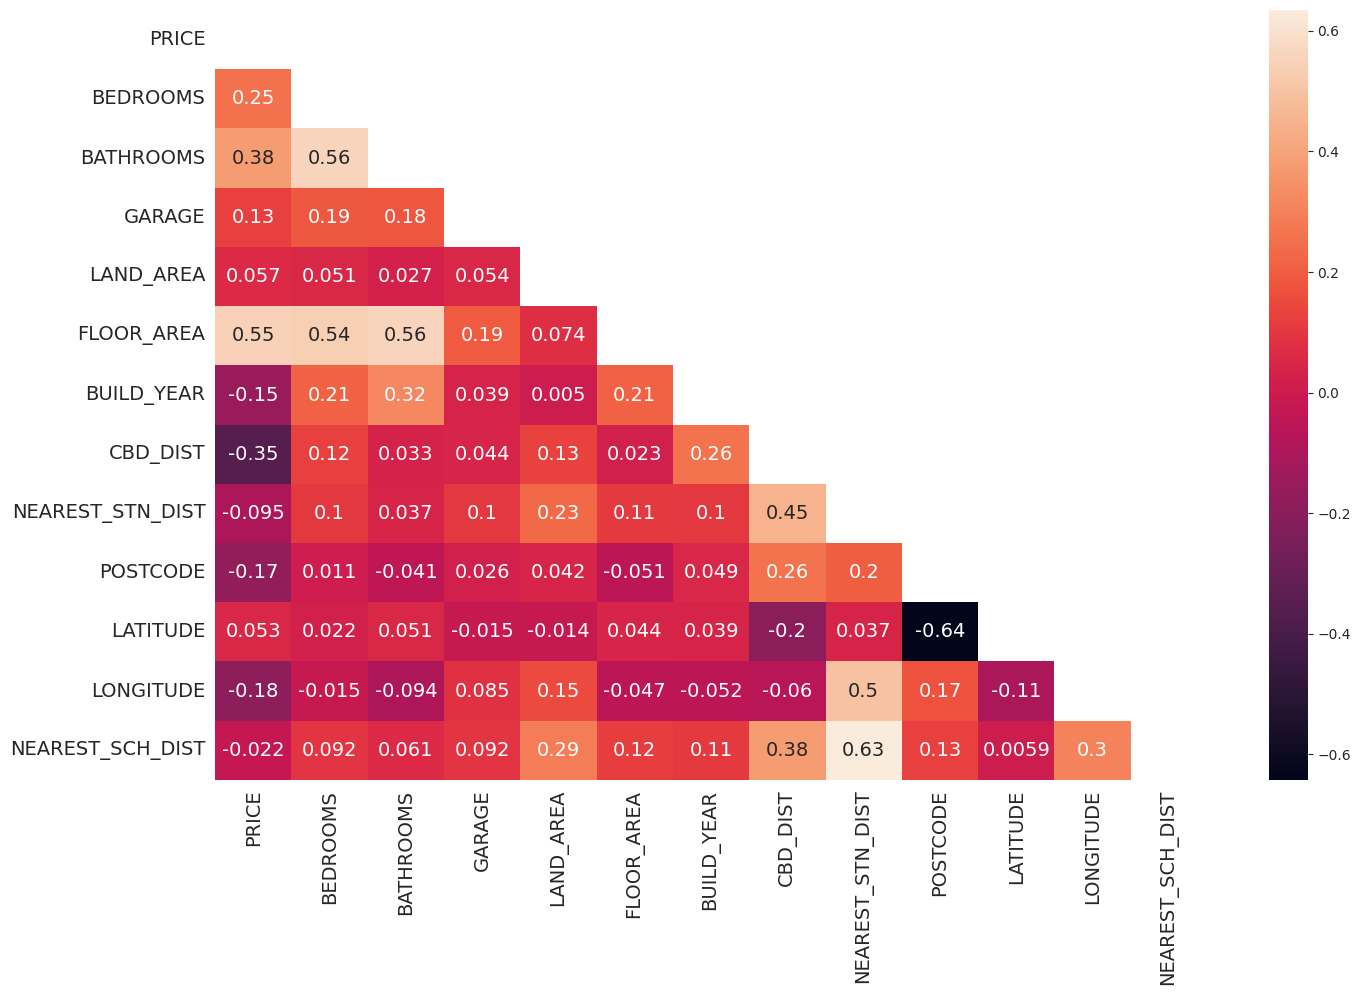

In [132]:
mask = np.zeros_like(all_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
seaborn.heatmap(all_data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
seaborn.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


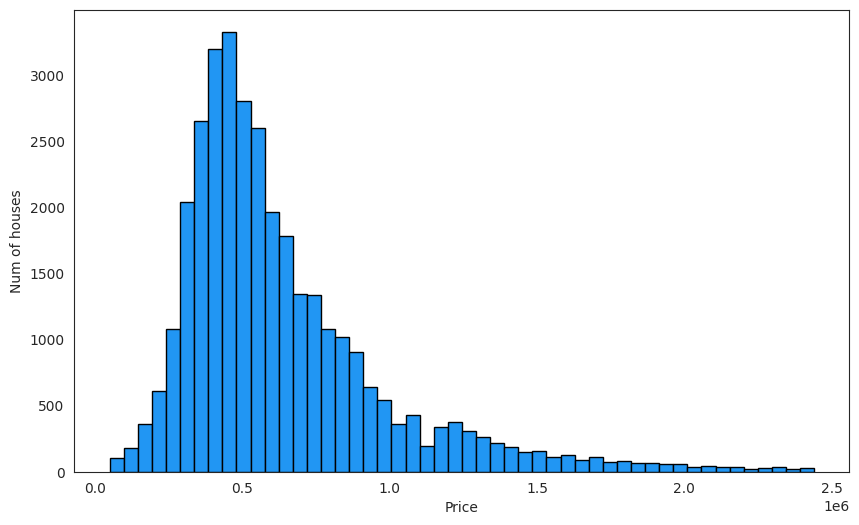

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(all_data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel("Price")
plt.ylabel("Num of houses")
plt.show()

<AxesSubplot: xlabel='FLOOR_AREA', ylabel='PRICE'>

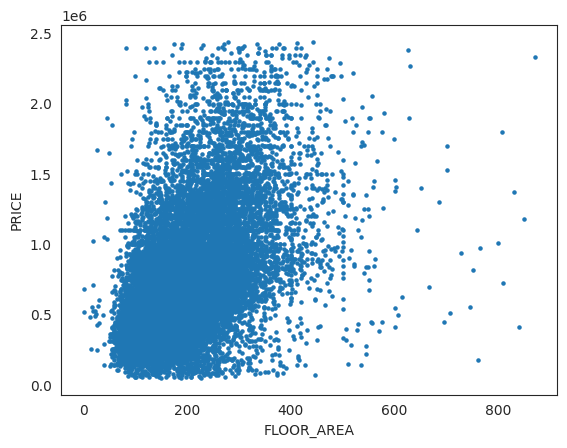

In [134]:
all_data.plot.scatter(x='FLOOR_AREA', y='PRICE', s=5)

array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDROOMS'}>,
        <AxesSubplot: title={'center': 'BATHROOMS'}>,
        <AxesSubplot: title={'center': 'GARAGE'}>],
       [<AxesSubplot: title={'center': 'LAND_AREA'}>,
        <AxesSubplot: title={'center': 'FLOOR_AREA'}>,
        <AxesSubplot: title={'center': 'BUILD_YEAR'}>,
        <AxesSubplot: title={'center': 'CBD_DIST'}>],
       [<AxesSubplot: title={'center': 'NEAREST_STN_DIST'}>,
        <AxesSubplot: title={'center': 'POSTCODE'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>],
       [<AxesSubplot: title={'center': 'NEAREST_SCH_DIST'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

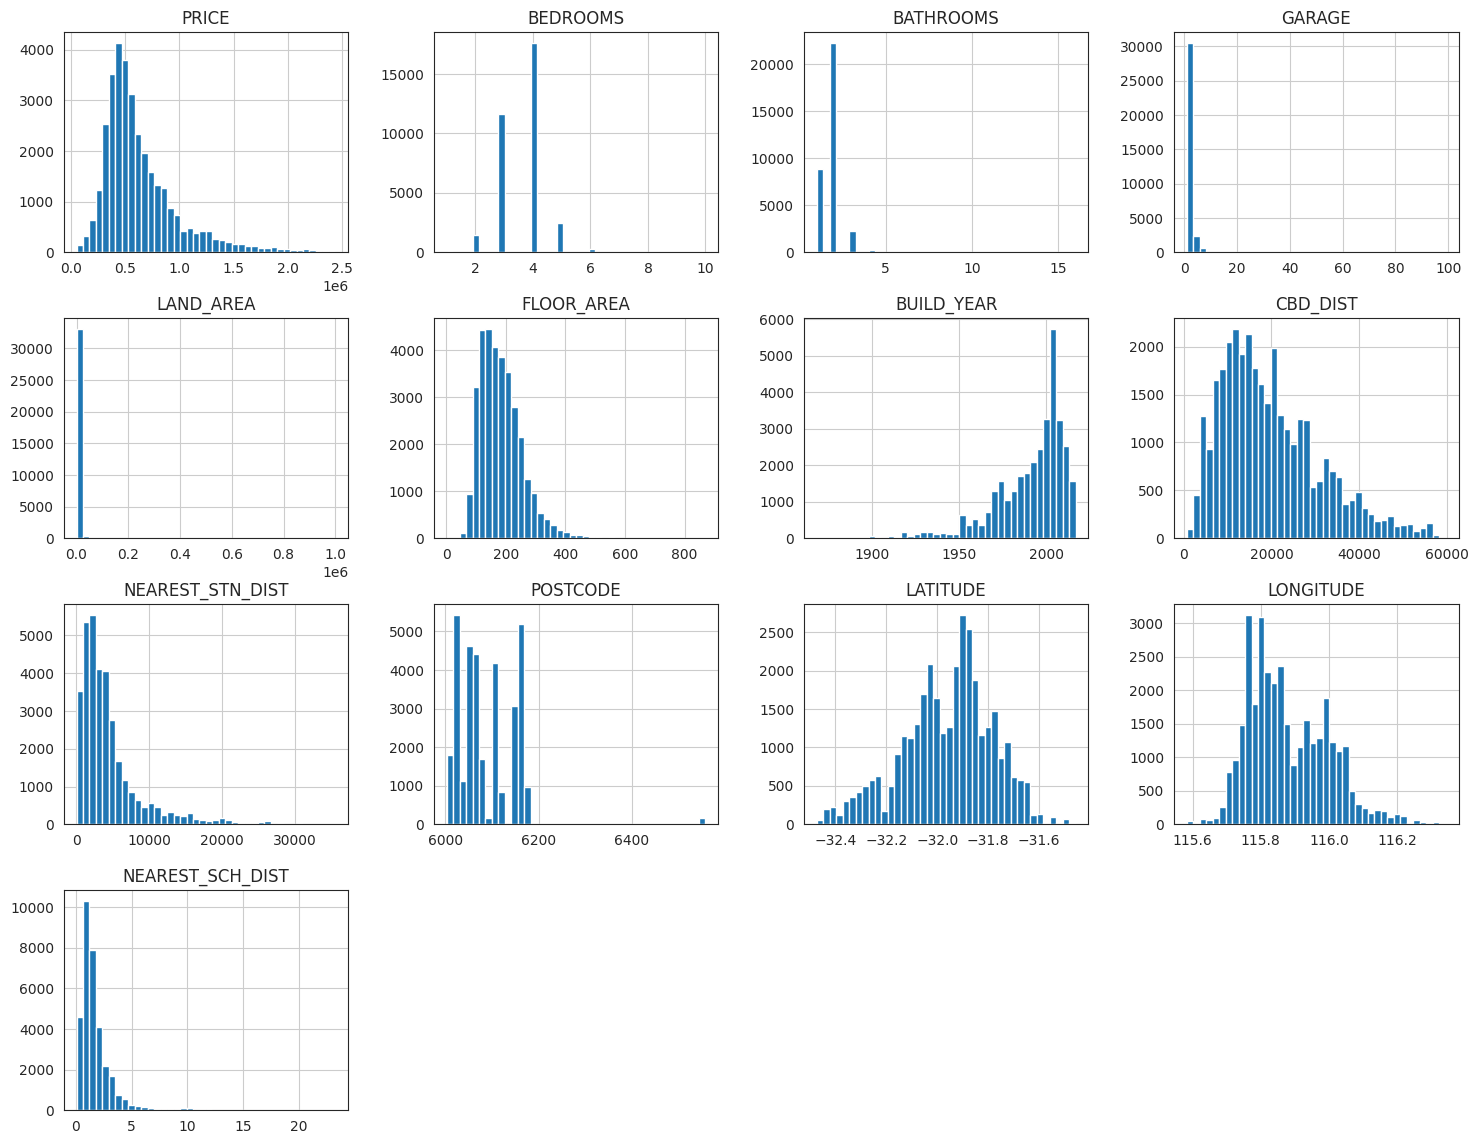

In [135]:
num_cols = list(all_data.select_dtypes(['int64', 'float64']))
all_data[num_cols].hist(bins=40, figsize=(18,14))

In [136]:
sum_before = all_data['ADDRESS'].count() 

all_data.drop(all_data[all_data['PRICE'] > 1500000].index, inplace=True)
all_data.drop(all_data[all_data['LAND_AREA'] > 1500].index, inplace=True)
all_data.drop(all_data[all_data['NEAREST_STN_DIST'] > 10000].index, inplace=True)

all_data.drop(all_data[all_data['BUILD_YEAR'] < 1960].index, inplace=True)
all_data.drop(all_data[all_data['NEAREST_SCH_DIST'] > 4].index, inplace=True)
all_data.dropna(inplace=True)

sum_after = all_data['ADDRESS'].count()

print(sum_before, sum_after)

33656 24097


In [137]:
X = all_data[['FLOOR_AREA']]
y = all_data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [138]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Trainig data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

Trainig data r-squared:  0.3529558644154982
Test data r-squared:  0.3528263455960897
